# **EXAMEN EDA**

Forest Covertype data (https://archive.ics.uci.edu/ml/datasets/Covertype )es un conjunto de datos cargado en la librería sklearn que permite realizar un ejercicio tipo problemas de clasificación. El objetivo de este dataset es estudiar las variables cartográficas para poder predecir el tipo de cubierta forestal. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del Servicio Forestal de EE.UU. (USFS).

Los datos están en forma cruda (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan bosques con mínimas perturbaciones causadas por el hombre, por lo que los tipos de cubierta forestal existentes son más el resultado de procesos ecológicos, que de prácticas de gestión forestal.

### Importamos librerías:

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Limpiamos el archivo:
#### Añadimos los nombres de las columnas.

In [50]:
# definir los nombres de las columnas
column_names = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area1",
    "Wilderness_Area2",
    "Wilderness_Area3",
    "Wilderness_Area4",
    "Soil_Type1",
    "Soil_Type2",
    "Soil_Type3",
    "Soil_Type4",
    "Soil_Type5",
    "Soil_Type6",
    "Soil_Type7",
    "Soil_Type8",
    "Soil_Type9",
    "Soil_Type10",
    "Soil_Type11",
    "Soil_Type12",
    "Soil_Type13",
    "Soil_Type14",
    "Soil_Type15",
    "Soil_Type16",
    "Soil_Type17",
    "Soil_Type18",
    "Soil_Type19",
    "Soil_Type20",
    "Soil_Type21",
    "Soil_Type22",
    "Soil_Type23",
    "Soil_Type24",
    "Soil_Type25",
    "Soil_Type26",
    "Soil_Type27",
    "Soil_Type28",
    "Soil_Type29",
    "Soil_Type30",
    "Soil_Type31",
    "Soil_Type32",
    "Soil_Type33",
    "Soil_Type34",
    "Soil_Type35",
    "Soil_Type36",
    "Soil_Type37",
    "Soil_Type38",
    "Soil_Type39",
    "Soil_Type40",
    "Cover_Type"
]

# lkee el archivo
with open("covtype.data", "r") as file:
    data = file.readlines()

# actualiza la primera línea con los nombres de las columnas
data[0] = ",".join(column_names) + "\n"

df = pd.read_csv('covtype.data', sep=',', names=column_names)
df


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


#### Juntamos las columnas de Soil y Wilderness.

In [51]:
df['Soil_Type'] = df[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].sum(axis=1)

df['Wilderness_Area'] = df[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)

# elimina las columnas de Soil
df = df.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

# elimina las columnas de Wilderness
df = df.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])

# printeamos
df


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


## Ejercicio 1:
Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

- Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.

- random_state=100

In [52]:
clf = RandomForestClassifier(random_state=100)

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

clf.fit(X, y)

importancias = clf.feature_importances_

df_imp = pd.DataFrame({'Variables': X.columns, 'Importancias': importancias})

df_imp = df_imp.sort_values(by='Importancias', ascending=False)

df_imp['Acumuladas'] = df_imp['Importancias'].cumsum()

variables_seleccionadas = df_imp[df_imp['Acumuladas'] <= 0.95]['Variables']

# Seleccionar sólo las variables que están presentes en df_csv
variables_seleccionadas = [v for v in variables_seleccionadas if v in df.columns]

# Crear un nuevo DataFrame sólo con las variables seleccionadas
df_reducido = df[variables_seleccionadas]

df_reducido



,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am
0,2596,510,6279,258,0,51,232,221
1,2590,390,6225,212,-6,56,235,220
2,2804,3180,6121,268,65,139,238,234
3,2785,3090,6211,242,118,155,238,238
4,2595,391,6172,153,-1,45,234,220
...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,153,237,240
581008,2391,95,845,67,12,152,237,240
581009,2386,90,854,60,7,159,241,236
581010,2384,90,864,60,5,170,245,230


### Ejercicio 2:
Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas:

2.1. Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2. Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1.
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1.

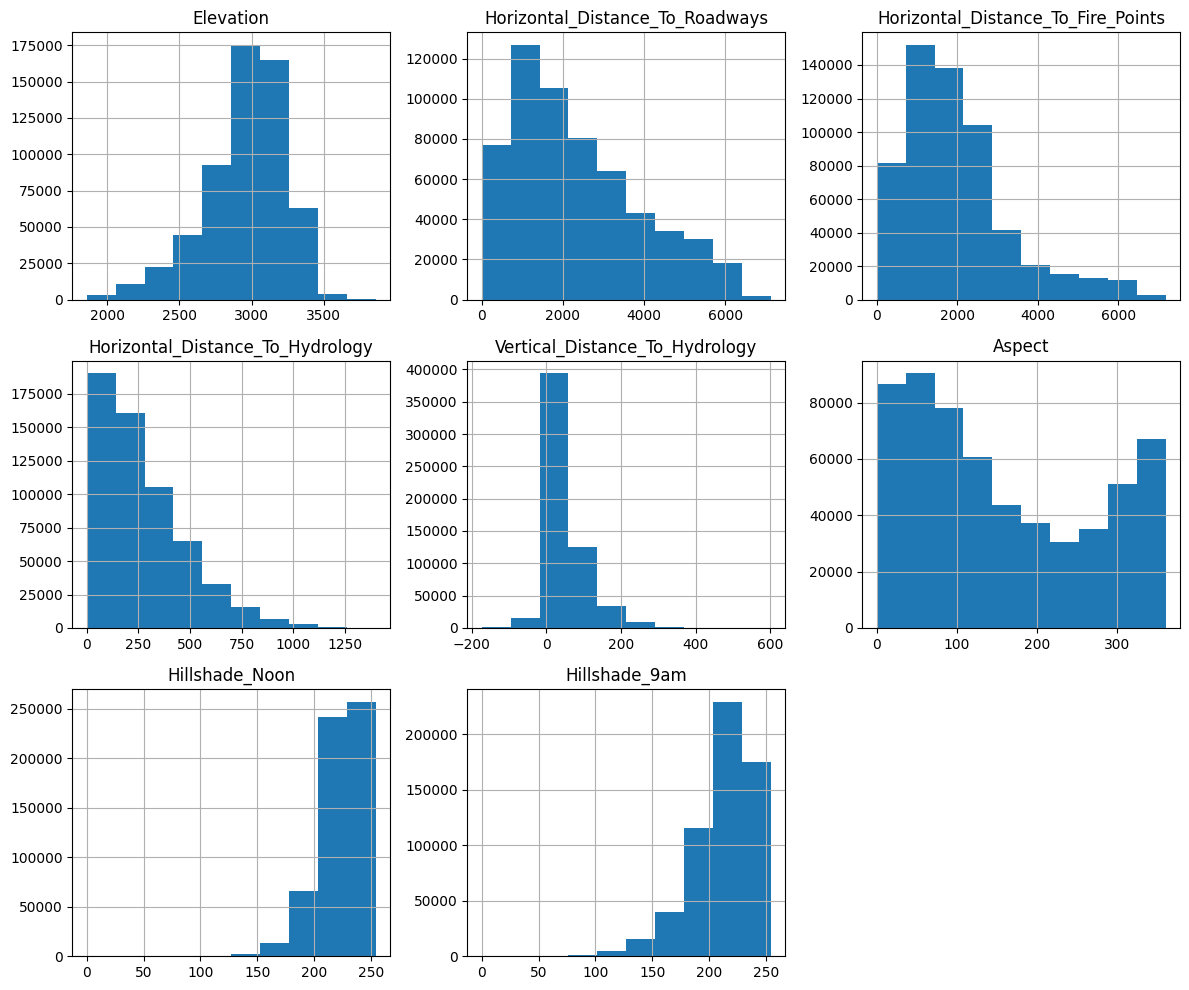

In [53]:
"""
Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

"""

df_reducido.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [54]:
"""
Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

"""

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_reducido)

# Crear un nuevo DataFrame con las variables normalizadas
df_normalized = pd.DataFrame(X_scaled, columns=df_reducido.columns)

df_normalized



,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.141667,0.913386,0.870079
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.155556,0.925197,0.866142
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.386111,0.937008,0.921260
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.430556,0.937008,0.937008
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.125000,0.921260,0.866142
...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.425000,0.933071,0.944882
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.422222,0.933071,0.944882
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.441667,0.948819,0.929134
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.472222,0.964567,0.905512


### Ejercicio 3:

Después de estandarizar los datos procedemos a crear el primer clasificador:

3.1 Divide el datset en training y en test:

- Guarda el 20% de los datos para testeo.

- random_state=100

3.2 Entrena un modelo de regresión logística:

- Número máximo de iteraciones igual a 1000
- random_state=100

3.3 Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

In [55]:
"""
Divide el datset en training y en test:

- Guarda el 20% de los datos para testeo.
- random_state=100

"""

X = df_normalized.drop('Elevation', axis=1)  
y = df_normalized['Elevation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [56]:
"""
Entrena un modelo de regresión logística:

- Número máximo de iteraciones igual a 1000
- random_state=100from sklearn.linear_model import LogisticRegression

"""

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)



LinearRegression()

In [57]:
"""
Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

"""

# Predicciones en el conjunto de entrenamiento y test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Métricas en el conjunto de test
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


### Ejercicio 4:
Ahora probamos la creación de otros modelo basados en árboles de decisión:

4.1 Entrena un modelo tipo Decision Tree Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:

- random_state=100
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)

4.2 Saca la curva de complejidad del modelo Decision Tree (Model Complexity Curve) y crea un nuevo clasificador con el valor óptimo de la profundidad del árbol según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.

- random_state=100
- rango de profundidades: de 2 a 30 inclusive

4.3 Saca la gráfica de el Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

- random_state=100
- (Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo).